#  IMDB MOVIE RATING ANALYSIS

In [2]:
import pandas as pd

In [3]:
movies = pd.read_csv(r'C:\Users\sakshi\Documents\29th- Kaggle Introduction, Pands Dataframe\archive\movie.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings = pd.read_csv(r'C:\Users\sakshi\Documents\29th- Kaggle Introduction, Pands Dataframe\archive\rating.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [4]:
tags = pd.read_csv(r'C:\Users\sakshi\Documents\29th- Kaggle Introduction, Pands Dataframe\archive\tag.csv')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [5]:
del tags['timestamp']

In [6]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


## Data Structures:

### Series

In [108]:
row_0 = tags.iloc[0]
row_0

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object

In [109]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [9]:
row_0['userId']

18

In [10]:
'rating' in tags

False

In [11]:
'rating' in ratings

True

In [110]:
row_0.name

0

In [111]:
row_0 = row_0.rename('row')
row_0.name

'row'

In [14]:
marks = pd.Series([89,98,78,88,69],name = "Gourab's Marks")

In [15]:
marks

0    89
1    98
2    78
3    88
4    69
Name: Gourab's Marks, dtype: int64

In [16]:
marks

0    89
1    98
2    78
3    88
4    69
Name: Gourab's Marks, dtype: int64

In [17]:
marks = marks.rename("suman's marks")
marks

0    89
1    98
2    78
3    88
4    69
Name: suman's marks, dtype: int64

In [18]:
marks.iloc[1]

98

In [19]:
row_0

userId              18
movieId           4141
tag        Mark Waters
Name: row, dtype: object

##  DataFrames

In [20]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [21]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [22]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [23]:
tags.iloc[ [0,11,500] ]  # by using iloc we can access particular indexes as we want

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
500,342,55908,entirely dialogue


In [24]:
tags.iloc[[12,56,20000]]

,userId,movieId,tag
12,65,2022,jesus
56,121,1288,comedy
20000,4450,8257,History


##  Descriptive Statistics

In [25]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [26]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [27]:
ratings['rating'].mean()

3.5255285642993797

In [28]:
ratings['rating'].max()

5.0

In [29]:
ratings['rating'].min()

0.5

In [30]:
ratings['rating'].mode()

0    4.0
Name: rating, dtype: float64

In [31]:
ratings['rating'].std()

1.0519889192942424

In [32]:
del ratings['timestamp']

In [33]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [34]:
filter1 = ratings['rating'] > 10
print(filter1)
filter1.any()

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool


False

In [35]:
filter2 = ratings['rating'] > 0
filter2.all()

True

## Data Cleaning: Handling Missing Data

In [36]:
movies.shape

(27278, 3)

In [37]:
movies.isnull().any().any()

False

In [38]:
ratings.shape

(20000263, 3)

In [39]:
ratings.isnull().any().any()

False

In [40]:
tags.shape

(465564, 3)

In [41]:
tags.isnull().any().any()

True

In [42]:
tags = tags.dropna() # drop the null values in the data
tags

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero
...,...,...,...
465559,138446,55999,dragged
465560,138446,55999,Jason Bateman
465561,138446,55999,quirky
465562,138446,55999,sad


In [43]:
tags.shape # after drop shape is reduced

(465548, 3)

##  Data Visualization

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

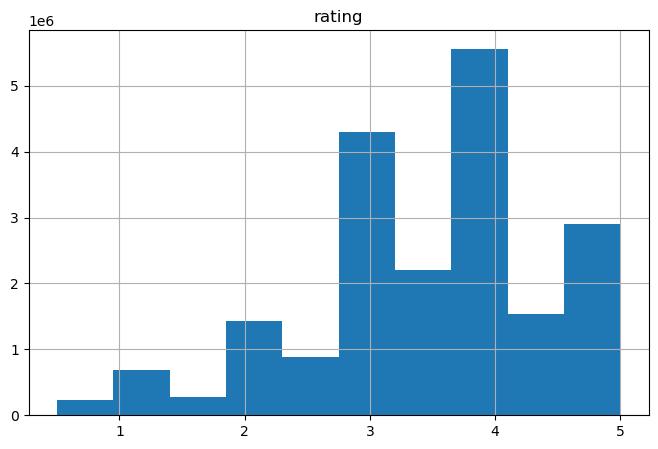

In [44]:
%matplotlib inline

ratings.hist(column='rating', figsize=(8,5))

<AxesSubplot:>

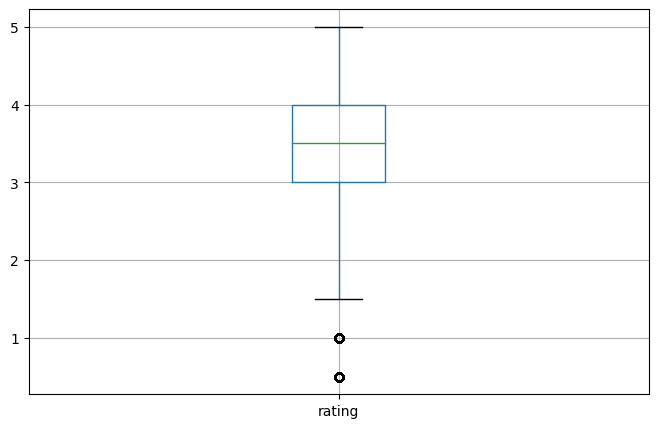

In [45]:
ratings.boxplot(column ='rating', figsize=(8,5))

## Slicing Out Columns

In [46]:
tags

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero
...,...,...,...
465559,138446,55999,dragged
465560,138446,55999,Jason Bateman
465561,138446,55999,quirky
465562,138446,55999,sad


In [47]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [48]:
tags[['userId','tag']].head()

,userId,tag
0,18,Mark Waters
1,65,dark hero
2,65,dark hero
3,65,noir thriller
4,65,dark hero


In [49]:
ratings

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
...,...,...,...
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0


In [50]:
ratings[-10:]

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [51]:
tag_counts = tags['tag'].value_counts()
tag_counts

tag
sci-fi                           3384
based on a book                  3281
atmospheric                      2917
comedy                           2779
action                           2657
                                 ... 
Paul Adelstein                      1
the wig                             1
killer fish                         1
genetically modified monsters       1
topless scene                       1
Name: count, Length: 38643, dtype: int64

In [52]:
tag_counts[-10:]

tag
missing child                    1
Ron Moore                        1
Citizen Kane                     1
mullet                           1
biker gang                       1
Paul Adelstein                   1
the wig                          1
killer fish                      1
genetically modified monsters    1
topless scene                    1
Name: count, dtype: int64

<AxesSubplot:xlabel='tag'>

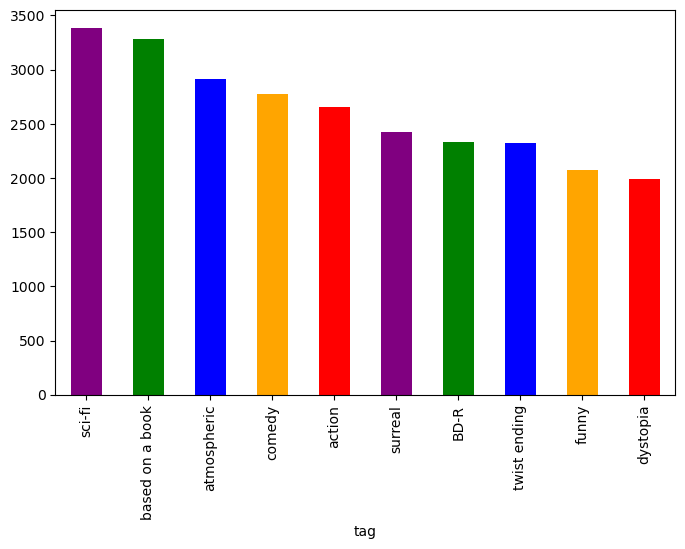

In [53]:
tag_counts[:10].plot(kind='bar', figsize=(8,5),color =['purple','green','blue','orange','red'])

## Filters for Selecting Rows

In [54]:
is_highly_rated = ratings['rating']>=5.0
ratings[is_highly_rated][30:50]

,userId,movieId,rating
239,3,50,5.0
242,3,175,5.0
244,3,223,5.0
245,3,260,5.0
246,3,316,5.0
247,3,318,5.0
248,3,329,5.0
252,3,457,5.0
253,3,480,5.0
254,3,490,5.0


In [55]:
is_action = movies['genres'].str.contains('Action')
movies[is_action]

,movieId,title,genres
5,6,Heat (1995),Action|Crime|Thriller
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller
14,15,Cutthroat Island (1995),Action|Adventure|Romance
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller
...,...,...,...
27168,130842,Power/Rangers (2015),Action|Adventure|Sci-Fi
27187,130984,Santo vs. las lobas (1976),Action|Fantasy|Horror
27198,131025,The Brass Legend (1956),Action
27236,131122,Love Exposure (2007),Action|Comedy|Drama|Romance


In [56]:
movies[is_action].head(15)

,movieId,title,genres
5,6,Heat (1995),Action|Crime|Thriller
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller
14,15,Cutthroat Island (1995),Action|Adventure|Romance
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller
22,23,Assassins (1995),Action|Crime|Thriller
41,42,Dead Presidents (1995),Action|Crime|Drama
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy
50,51,Guardian Angel (1994),Action|Drama|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller


## Group By and Aggregate

In [57]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [58]:
ratings

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
...,...,...,...
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0


In [59]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


In [60]:
average_rating = ratings[['movieId','rating']].groupby('movieId').count()
average_rating.head()

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


## Merge Dataframes

In [61]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [62]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [63]:
t = movies.merge(tags, on ='movieId',how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


In [64]:
ratings

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
...,...,...,...
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0


## Combine aggreagation, merging, and filters to get useful analytics

In [65]:
avg_ratings= ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [66]:
box_office = movies.merge(avg_ratings, on='movieId', how='right')
box_office.tail()

,movieId,title,genres,rating
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26741,131258,The Pirates (2014),Adventure,2.5
26742,131260,Rentun Ruusu (2001),(no genres listed),3.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [67]:
box_office = movies.merge(avg_ratings, on='movieId')
box_office.tail()

,movieId,title,genres,rating
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26741,131258,The Pirates (2014),Adventure,2.5
26742,131260,Rentun Ruusu (2001),(no genres listed),3.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [68]:
is_highly_rated = box_office['rating'] >= 4.0
box_office[is_highly_rated][-5:]

,movieId,title,genres,rating
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [69]:
is_adventure = box_office['genres'].str.contains('Adventure')
box_office[is_adventure][-5:]

,movieId,title,genres,rating
26683,131084,Hui Buh: The Castle Ghost (2006),Adventure|Comedy|Fantasy,2.5
26687,131092,"Mickey, Donald, Goofy: The Three Musketeers (2...",Adventure|Animation|Children|Comedy,3.0
26736,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,4.0
26741,131258,The Pirates (2014),Adventure,2.5
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [70]:
box_office[is_highly_rated & is_adventure][-5:]

,movieId,title,genres,rating
26611,130586,Itinerary of a Spoiled Child (1988),Adventure|Drama,4.5
26655,130996,The Beautiful Story (1992),Adventure|Drama|Fantasy,5.0
26667,131050,Stargate SG-1 Children of the Gods - Final Cut...,Adventure|Sci-Fi|Thriller,5.0
26736,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


##  Vectorized String Operations

In [71]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [75]:
movie_genres = movies['genres'].str.split('|', expand = True)
movie_genres

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
27273,Comedy,None,None,None,None,None,None,None,None,None
27274,Comedy,None,None,None,None,None,None,None,None,None
27275,Adventure,None,None,None,None,None,None,None,None,None
27276,(no genres listed),None,None,None,None,None,None,None,None,None


In [79]:
movie_genres[0:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


## Add a new column for comedy genre flag 

In [101]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [102]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


## Extract year from title e.g. (2007) 

In [103]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [104]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True) 

In [106]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


##  Parsing Timestamps

In [130]:
tags = pd.read_csv(r'C:\Users\sakshi\Documents\29th- Kaggle Introduction, Pands Dataframe\archive\tag.csv',sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [125]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp    object
dtype: object

In [128]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'])
tags

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,2009-04-24 18:19:40,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18,2013-05-10 01:41:18
...,...,...,...,...,...
465559,138446,55999,dragged,2013-01-23 23:29:32,2013-01-23 23:29:32
465560,138446,55999,Jason Bateman,2013-01-23 23:29:38,2013-01-23 23:29:38
465561,138446,55999,quirky,2013-01-23 23:29:38,2013-01-23 23:29:38
465562,138446,55999,sad,2013-01-23 23:29:32,2013-01-23 23:29:32
